# Контекст

- классификации токенов NER на русском языке
- использовал внутренний конструктор transformers.Trainer
- model/trokenizer = "DeepPavlov/rubert-base-cased"
- данные - новости на русском языке

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import warnings
from datasets import load_dataset



import matplotlib.pyplot as plt
import seaborn as sns

from functions import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
warnings.filterwarnings("ignore")
print('CUDA ?: ', torch.cuda.is_available())

# Чтение данных

In [65]:
# NER токены, присутствующие в наборе
mapper

{0: 'O',
 1: 'I-AGE',
 2: 'B-AGE',
 3: 'B-AWARD',
 4: 'I-AWARD',
 5: 'B-CITY',
 6: 'I-CITY',
 7: 'B-COUNTRY',
 8: 'I-COUNTRY',
 9: 'B-CRIME',
 10: 'I-CRIME',
 11: 'B-DATE',
 12: 'I-DATE',
 13: 'B-DISEASE',
 14: 'I-DISEASE',
 15: 'B-DISTRICT',
 16: 'I-DISTRICT',
 17: 'B-EVENT',
 18: 'I-EVENT',
 19: 'B-FACILITY',
 20: 'I-FACILITY',
 21: 'B-FAMILY',
 22: 'I-FAMILY',
 23: 'B-IDEOLOGY',
 24: 'I-IDEOLOGY',
 25: 'B-LANGUAGE',
 26: 'I-LAW',
 27: 'B-LAW',
 28: 'B-LOCATION',
 29: 'I-LOCATION',
 30: 'B-MONEY',
 31: 'I-MONEY',
 32: 'B-NATIONALITY',
 33: 'I-NATIONALITY',
 34: 'B-NUMBER',
 35: 'I-NUMBER',
 36: 'B-ORDINAL',
 37: 'I-ORDINAL',
 38: 'B-ORGANIZATION',
 39: 'I-ORGANIZATION',
 40: 'B-PENALTY',
 41: 'I-PENALTY',
 42: 'B-PERCENT',
 43: 'I-PERCENT',
 44: 'B-PERSON',
 45: 'I-PERSON',
 46: 'I-PRODUCT',
 47: 'B-PRODUCT',
 48: 'B-PROFESSION',
 49: 'I-PROFESSION',
 50: 'B-RELIGION',
 51: 'I-RELIGION',
 52: 'B-STATE_OR_PROVINCE',
 53: 'I-STATE_OR_PROVINCE',
 54: 'B-TIME',
 55: 'I-TIME',
 56: 'B-WOR

In [14]:
ds = load_dataset("surdan/nerel_short")

train = pd.DataFrame(ds['train'])
val = pd.DataFrame(ds['dev'])

indexes_no_0 = [] 
for index, spisok in enumerate(train['sequences'].to_list()):
    if len(spisok) != 0:
        indexes_no_0.append(index)

train = train.iloc[indexes_no_0].reset_index(drop = True)
# test = pd.DataFrame(ds['test'])
train.head()

,sequences,ids
0,"[Виталий, Кличко, хочет, стать, мэром, Киева, ...","[44, 45, 0, 0, 48, 5, 0, 3, 4, 0, 0, 0, 0, 0, ..."
1,"[Я, хочу, стать, мэром, Киева, так, как, я, оч...","[0, 0, 0, 48, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[Виталий, Кличко, был, чемпионом, мира, по, ве...","[44, 45, 0, 3, 4, 0, 0, 38]"
3,"[преследовавших, его, травм, в, ноябре, 2005, ...","[0, 0, 0, 11, 12, 12, 12, 0, 0, 0, 48, 0, 0, 1..."
4,"[Подозреваемый, в, гибели, Марины, Голуб, Алек...","[0, 0, 17, 44, 45, 44, 45, 17, 0, 0, 0, 0, 11,..."


<Axes: ylabel='Density'>

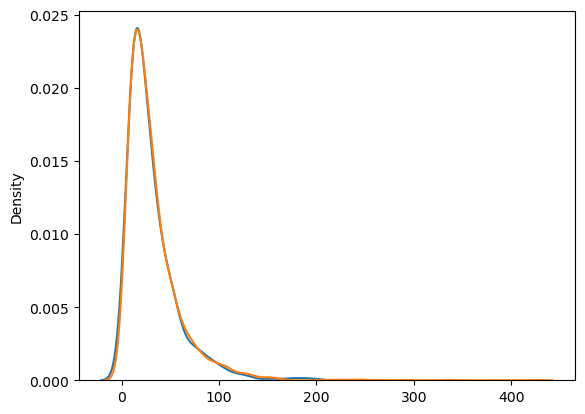

In [15]:
# распределение длин последовательностей 
lens = []
for spisok in val['sequences']:
    lens.append(len(spisok))

lens_train = []
for spisok in train['sequences']:
    lens_train.append(len(spisok))

sns.kdeplot(lens, label = 'val')
sns.kdeplot(lens_train, label = 'train')
plt.legend()
plt.title('Распределение длин последовательностей train/val')

In [16]:
train_list = [item for sublist in train['ids'].to_list() for item in sublist]
train_data = pd.Series(train_list).value_counts()


val_list = [item for sublist in val['ids'].to_list() for item in sublist]
val_data = pd.Series(val_list).value_counts()


data_to_plot =\
pd.merge(
    train_data.reset_index(), val_data.reset_index(),
    on = 'index'
).rename({'count_x': 'train_NER`s', 'count_y': 'val_NER`s'}, axis = 1)# .set_index('index')

data_to_plot

,index,train_NER`s,val_NER`s
0,0,45995,9123
1,12,3799,827
2,44,3581,761
3,48,2735,587
4,38,2551,390
5,45,2497,506
6,39,2448,461
7,17,2258,574
8,49,2043,246
9,11,1848,434


# Смешение датасетов

In [17]:
from sklearn.model_selection import train_test_split

all_dataset = pd.concat([train, val], axis = 0).sample(frac = 1, random_state = 42)

train, val = train_test_split(
    all_dataset,
    test_size = 0.2,
    random_state = 42
)

train = train.reset_index(drop = True)
val = val.reset_index(drop = True)

# Токенизация данных

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

# Выравнивание датасета (добавление -100 вместо CLS-SEP-PAD-##токен)

In [ ]:
from datasets import Dataset


dataset_train = Dataset.from_pandas(train.sample(frac = 1, random_state = 42))
dataset_val = Dataset.from_pandas(val)


def create_date_for_NER_clf_2(data): # data - pd.DataFrame 
    spisok_tokens = data['sequences']
    labels = data['ids']
    input = tokenizer(
        spisok_tokens,
        is_split_into_words = True) # учитывает пробелы между строк
    labels_new = [0]*len(input.word_ids())
    previous_idx = None
    koeff_index_up = 0
    labels_new[0] = -100
    labels_new[-1] = -100
    for idx in input.word_ids()[1:-1]:
        now_idx = idx
        idx_of_new_spisok = idx + 1 + koeff_index_up
        if now_idx != previous_idx:
            labels_new[idx_of_new_spisok] = labels[now_idx]
        if now_idx == previous_idx:
            labels_new[idx_of_new_spisok+1] = -100
            koeff_index_up += 1

        previous_idx = now_idx

    input['labels'] = labels_new

    return input


tokenized_dataset_train = dataset_train.map(create_date_for_NER_clf_2)
tokenized_dataset_val = dataset_val.map(create_date_for_NER_clf_2)

# Проверка правильности токенизации

In [25]:
tokenizer_vocab_ids_token = {value: key for key, value in tokenizer.get_vocab().items()}
tokenizer_vocab_ids_token

index = 3

labels = train.iloc[index]['ids']
input = tokenizer(train.iloc[index]['sequences'], is_split_into_words = True)
print(labels)
print(input['input_ids'])

labels_new = [0]*len(input.word_ids())
previous_idx = None
koeff_index_up = 0
labels_new[0] = -100
labels_new[-1] = -100
for idx in input.word_ids()[1:-1]:
    now_idx = idx
    idx_of_new_spisok = idx + 1 + koeff_index_up
    if now_idx != previous_idx:
        labels_new[idx_of_new_spisok] = labels[now_idx]
    if now_idx == previous_idx:
        labels_new[idx_of_new_spisok+1] = -100
        koeff_index_up += 1

    previous_idx = now_idx



def create_str_NER_tokens(lables_new_after_alignment):
    NER_tokens = []
    for ids in lables_new_after_alignment:
        if ids == -100:
            NER_tokens.append('CLS-SEP-PAD-##токен')
        else:
            NER_tokens.append(mapper[ids])

    return NER_tokens


NER_tokens = create_str_NER_tokens(labels_new)

slovar = {
    'токены': [tokenizer_vocab_ids_token[ids] for ids in input['input_ids']],
    'input.word_ids()': input.word_ids(),
    'после выравнивания': labels_new,
    'NER токены': NER_tokens
}
    
pd.DataFrame(slovar)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 12]
[101, 4411, 4638, 2886, 14781, 113791, 23644, 3431, 1469, 7011, 3787, 3468, 29462, 32642, 12846, 845, 8018, 848, 102]


,токены,input.word_ids(),после выравнивания,NER токены
0,[CLS],NaN,-100,CLS-SEP-PAD-##токен
1,После,0.0,0,O
2,этого,1.0,0,O
3,он,2.0,0,O
4,дважды,3.0,0,O
5,перена,4.0,0,O
6,##знач,4.0,-100,CLS-SEP-PAD-##токен
7,##ался,4.0,-100,CLS-SEP-PAD-##токен
8,на,5.0,0,O
9,этот,6.0,0,O


# модель/токенизатор

In [ ]:
id2label = {str(k): v for k, v in mapper.items()}
label2id = {v: k for k, v in id2label.items()}
label_names = list(id2label.values())

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModelForTokenClassification.from_pretrained("DeepPavlov/rubert-base-cased", id2label=id2label, label2id=label2id)

# Функция подсчета метрик

In [21]:
from datasets import load_metric


metric = load_metric("seqeval")

def compute_metrics(eval_preds):

    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [[label_names[p] for (p, l) in zip(prediction, label) if l != -100]
                        for prediction, label in zip(predictions, labels)
                        ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }

# Обучение модели

In [ ]:
from transformers import EarlyStoppingCallback

training_args = TrainingArguments(

        output_dir='training/model_points',
        do_train=True,
        do_eval=True,
        num_train_epochs = 25,
        per_device_train_batch_size = 32,
        per_device_eval_batch_size = 32,
        warmup_steps = 100,
        weight_decay = 0.01,
        logging_dir='training/logs',
        logging_steps = 50,
        evaluation_strategy = "epoch",
        save_strategy = 'epoch',
        save_steps = 500,
        fp16=True,
        load_best_model_at_end = True,
        report_to = 'wandb',
        learning_rate = 0.00002

)

data_collator = DataCollatorForTokenClassification(tokenizer = tokenizer)

trainer = Trainer(

        model = model,
        args = training_args,
        train_dataset = tokenized_dataset_train,
        eval_dataset = tokenized_dataset_val,
        compute_metrics = compute_metrics,
        tokenizer = tokenizer,
        callbacks=[EarlyStoppingCallback(early_stopping_patience = 5)],
        data_collator = data_collator

)

trainer.train()

# Визуализация f1_score на val наборе

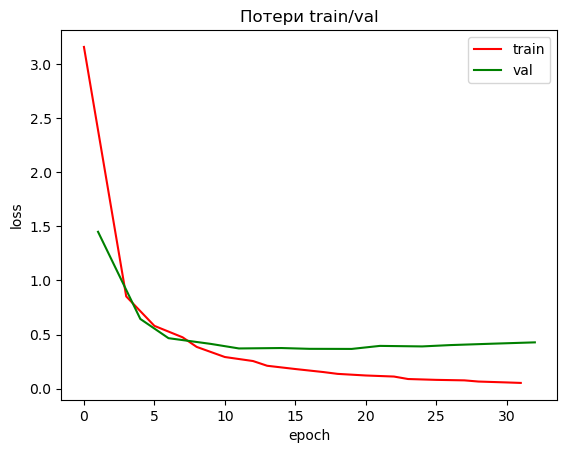

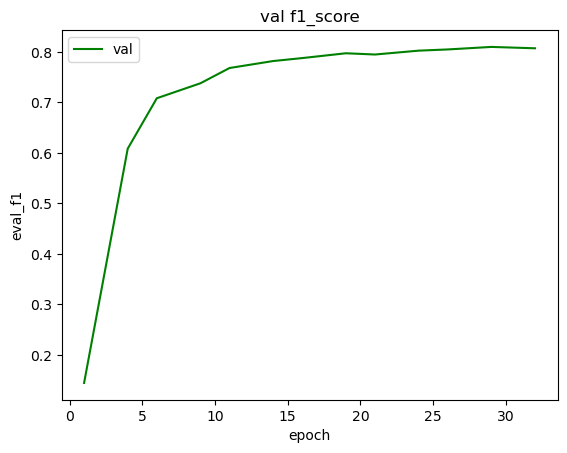

In [33]:
data_results = pd.DataFrame(trainer.state.log_history)
spisok_train_losses = data_results['loss'].reset_index() # [data_results['eval_loss'].notnull()]
spisok_train_losses = spisok_train_losses[spisok_train_losses['loss'].notnull()].rename({'index': 'epoch', 'loss': 'train_loss'}, axis = 1)
spisok_val_losses = data_results['eval_loss'].reset_index() # [data_results['eval_loss'].notnull()]
spisok_val_losses = spisok_val_losses[spisok_val_losses['eval_loss'].notnull()].rename({'index': 'epoch', 'eval_loss': 'val_loss'}, axis = 1)

sns.lineplot(
    data = spisok_train_losses,
    x = 'epoch',
    y = 'train_loss',
    label = 'train',
    color = 'red'
)
sns.lineplot(
    data = spisok_val_losses,
    x = 'epoch',
    y = 'val_loss',
    label = 'val',
    color = 'green'
)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Потери train/val')
plt.show()


spisok_val_f1 = data_results['eval_f1'].reset_index() # [data_results['eval_loss'].notnull()]
spisok_val_f1 = spisok_val_f1[spisok_val_f1['eval_f1'].notnull()].rename({'index': 'epoch'}, axis = 1)
sns.lineplot(
    data = spisok_val_f1,
    x = 'epoch',
    y = 'eval_f1',
    label = 'val',
    color = 'green'
)

plt.title('val f1_score')
plt.show()

# Проверка модели на тестовом наборе

In [ ]:
from transformers import pipeline

model_checkpoint = "training/model_points/checkpoint-1001"
token_classifier = pipeline("token-classification", model = model_checkpoint, tokenizer = tokenizer, aggregation_strategy="simple")

In [51]:
test = pd.DataFrame(ds['test'])
test.head()

,sequences,ids
0,"[Кевин, Радд, станет, новым, Австралии, Экс, п...","[44, 45, 0, 0, 7, 0, 48, 49, 44, 45, 17, 38, 0..."
1,"[В, ходе, голосования, кандидатуру, Радда, под...","[0, 0, 0, 0, 44, 0, 34, 48, 34, 0, 0, 0, 44, 45]"
2,"[Чем, известен, Кевин, Радд, В, 1972, году, в,...","[0, 0, 44, 45, 11, 12, 12, 0, 0, 2, 1, 44, 45,..."
3,"[В, годах, возглавил, Лейбористскую, партию, А...","[11, 12, 0, 23, 39, 39]"
4,"[Как, Радд, ушел, с, поста, министра, иностран...","[0, 44, 17, 18, 18, 48, 49, 49, 11, 12, 12, 12..."


In [62]:
model = model.cpu()

def print_result(index):
    stroka = ' '.join(test['sequences'][index])
    print(stroka)
    print(pd.DataFrame(token_classifier(stroka)))

print_result(0)

Кевин Радд станет новым Австралии Экс премьер Австралии Кевин Радд возглавит правительство страны Новым лидером правящей Лейбористской партии Австралии в среду избран экс премьер страны Кевин Радд он возглавит правительство страны сообщает агентство Рейтер
    entity_group     score                  word  start  end
0         PERSON  0.997370            Кевин Радд      0   10
1        COUNTRY  0.996337             Австралии     24   33
2     PROFESSION  0.996135               премьер     38   45
3        COUNTRY  0.996457             Австралии     46   55
4         PERSON  0.997342            Кевин Радд     56   66
5          EVENT  0.976680             возглавит     67   76
6   ORGANIZATION  0.427776         правительство     77   90
7     PROFESSION  0.797381               лидером    104  111
8   ORGANIZATION  0.978605  Лейбористской партии    121  141
9        COUNTRY  0.996323             Австралии    142  151
10          DATE  0.989237               в среду    152  159
11         

In [63]:
print_result(1)

В ходе голосования кандидатуру Радда поддержали 57 парламентариев 45 проголосовали за действующего Джулию Гиллард
  entity_group     score            word  start  end
0       PERSON  0.987951           Радда     31   36
1       NUMBER  0.981740              57     48   50
2   PROFESSION  0.996469  парламентариев     51   65
3       NUMBER  0.949169              45     66   68
4        EVENT  0.940752   проголосовали     69   82
5       PERSON  0.998012           Джули     99  104
6       PERSON  0.997356     ##ю Гиллард    104  113


In [64]:
print_result(400)

Кузя УО играл на гитаре и в студийных записях и концертных выступлениях В 1985 году его призвали в армию хотя у него наблюдались серьёзные проблемы с сердцем проблемы с сердцем
  entity_group     score                word  start  end
0       PERSON  0.929708                 Куз      0    3
1       PERSON  0.776473              ##я УО      3    7
2         DATE  0.996700         В 1985 году     72   83
3        EVENT  0.996386    призвали в армию     88  104
4      DISEASE  0.784359  проблемы с сердцем    139  157
5      DISEASE  0.828284  проблемы с сердцем    158  176
